***Тема курсового проекта: "Спрогнозировать себестоимость в рублях с помощью модели линейной регрессии y_hat = b0 + b1*x1 + b2*x2 + ... bn*xn матричным способом"***

**Описание датасета**

* **НомерЗаказа**     - номер документа Автозаказ в программе 1с
* **ГодЗаказа**       - год из поля дата документа Автозаказ
* **МесяцЗаказа**     - месяц из поля дата документа Автозаказ
* **ДеньЗаказа**      - день из поля дата документа Автозаказ
* **НеделяЗаказа**    - номер недели из поля дата документа Автозаказ
* **КодТовара**       - код товара, количество которого необходимо заказать (из табличной части документа Автозаказ)
* **ЦЕНА_ЗКП_РУБ**    - цена закупочная в рублях
* **СРОК_ГДН_ОСТ_Д**  - срок годности остаточный, в днях
* **ОСТ_ТЕК_ШТ**      - текущий остаток в шт/кг
* **ТОВ_В_ПУТ_СУМ_ШТ**- товара в пути в шт/кг
* **ПРДЖ_СР_ШТ_ДО**   - продажи средние шт/кг
* **КВО_ПРДЖ_БАЗА_ШТ**- продажи базовые в шт
* **ПРДЖ_БАЗА_СР_ШТ** - продажи, базовые, средние, шт/кг
* **ППП_ДЛН_Д**       - период покрытия продаж длительность дней
* **ТРБ_МАГ_КВНТ_ШТ** - требование магазина, квант, шт/кг
* **ПРДЖ_ШТ_НЕД**     - недельные продажи 
* **СПИС_ШТ_НЕД**     - недельные списания 

* **ЗКЗ_ИТГ_ШТ**    - количество к заказу, наша целевая переменная, которую мы будем пытаться предсказать

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
%matplotlib inline

In [68]:
df = pd.read_csv('Order1c_pred.csv')
df['Себестоимость'] = df['ЦЕНА_ЗКП_РУБ']*df['КВО_ПРДЖ_БАЗА_ШТ']
df.head()

,НомерЗаказа,ГодЗаказа,МесяцЗаказа,ДеньЗаказа,НеделяЗаказа,КодТовара,ЦЕНА_ЗКП_РУБ,СРОК_ГДН_ОСТ_Д,ОСТ_ТЕК_ШТ,ТОВ_В_ПУТ_СУМ_ШТ,ПРДЖ_СР_ШТ_ДО,КВО_ПРДЖ_БАЗА_ШТ,ПРДЖ_БАЗА_СР_ШТ,ППП_ДЛН_Д,ТРБ_МАГ_КВНТ_ШТ,ПРДЖ_ШТ_НЕД,СПИС_ШТ_НЕД,ЗКЗ_ИТГ_ШТ,Себестоимость
0,M3300009893,2018,4,24,17,389 965,67.85,245,21.0,0.0,0.68421,3,5.50612,14,6.0,2.0,0.0,6.0,203.55
1,M3300009893,2018,4,24,17,389 970,36.03,245,14.0,0.0,0.45714,5,3.28168,14,12.0,3.0,0.0,12.0,180.15
2,M3300009893,2018,4,24,17,366 976,30.54,482,12.0,0.0,0.31428,5,2.20001,14,6.0,0.0,0.0,6.0,152.70
3,M3300009893,2018,4,24,17,367 448,46.40,241,11.0,0.0,0.10345,4,0.79365,14,10.0,0.0,1.0,10.0,185.60
4,M3300009893,2018,4,24,17,260 461,50.92,245,12.0,0.0,0.39999,5,2.62693,14,12.0,4.0,0.0,12.0,254.60


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659803 entries, 0 to 659802
Data columns (total 19 columns):
НомерЗаказа         659803 non-null object
ГодЗаказа           659803 non-null int64
МесяцЗаказа         659803 non-null int64
ДеньЗаказа          659803 non-null int64
НеделяЗаказа        659803 non-null int64
КодТовара           659803 non-null object
ЦЕНА_ЗКП_РУБ        659803 non-null float64
СРОК_ГДН_ОСТ_Д      659803 non-null int64
ОСТ_ТЕК_ШТ          659803 non-null float64
ТОВ_В_ПУТ_СУМ_ШТ    659803 non-null float64
ПРДЖ_СР_ШТ_ДО       659803 non-null float64
КВО_ПРДЖ_БАЗА_ШТ    659803 non-null int64
ПРДЖ_БАЗА_СР_ШТ     659803 non-null float64
ППП_ДЛН_Д           659803 non-null int64
ТРБ_МАГ_КВНТ_ШТ     659803 non-null float64
ПРДЖ_ШТ_НЕД         659803 non-null float64
СПИС_ШТ_НЕД         659803 non-null float64
ЗКЗ_ИТГ_ШТ          659803 non-null float64
Себестоимость       659803 non-null float64
dtypes: float64(10), int64(7), object(2)
memory usage: 95.6+ MB


Найдем топ самых частовстречающихся строк с товарами

In [70]:
df['КодТовара'].value_counts().head()

84 566     1021
84 560     1012
33 793     1011
85 009     1010
214 116     996
Name: КодТовара, dtype: int64

Сделаем выборку по первому товару из списка с кодом 84566

In [71]:
df['КодТовара'] = df['КодТовара'].str.replace('\s', '')
df_filter = df['КодТовара'].isin(["84566"])
df = df[df_filter]

df.head()

,НомерЗаказа,ГодЗаказа,МесяцЗаказа,ДеньЗаказа,НеделяЗаказа,КодТовара,ЦЕНА_ЗКП_РУБ,СРОК_ГДН_ОСТ_Д,ОСТ_ТЕК_ШТ,ТОВ_В_ПУТ_СУМ_ШТ,ПРДЖ_СР_ШТ_ДО,КВО_ПРДЖ_БАЗА_ШТ,ПРДЖ_БАЗА_СР_ШТ,ППП_ДЛН_Д,ТРБ_МАГ_КВНТ_ШТ,ПРДЖ_ШТ_НЕД,СПИС_ШТ_НЕД,ЗКЗ_ИТГ_ШТ,Себестоимость
1190,M3300009980,2018,4,24,17,84566,21.4,2,0.0,10.0,8.18181,4,57.86321,1,1.0,65.0,3.0,14.0,85.6
1368,M3300010449,2018,4,29,17,84566,21.4,2,0.0,12.0,8.10000,3,58.27958,1,1.0,59.0,2.0,14.0,64.2
1799,M3300010577,2018,5,2,18,84566,21.4,2,10.0,8.0,8.10000,3,58.22726,1,1.0,53.0,3.0,6.0,64.2
3835,M3300010090,2018,4,25,17,84566,21.4,2,4.0,10.0,8.18181,4,57.83369,1,1.0,64.0,3.0,11.0,85.6
3842,M3300010484,2018,4,30,18,84566,21.4,2,4.0,12.0,8.10000,3,58.17608,1,1.0,60.0,2.0,10.0,64.2


In [72]:
df = df.select_dtypes(include = ['float64', 'int64'])
df.head()

,ГодЗаказа,МесяцЗаказа,ДеньЗаказа,НеделяЗаказа,ЦЕНА_ЗКП_РУБ,СРОК_ГДН_ОСТ_Д,ОСТ_ТЕК_ШТ,ТОВ_В_ПУТ_СУМ_ШТ,ПРДЖ_СР_ШТ_ДО,КВО_ПРДЖ_БАЗА_ШТ,ПРДЖ_БАЗА_СР_ШТ,ППП_ДЛН_Д,ТРБ_МАГ_КВНТ_ШТ,ПРДЖ_ШТ_НЕД,СПИС_ШТ_НЕД,ЗКЗ_ИТГ_ШТ,Себестоимость
1190,2018,4,24,17,21.4,2,0.0,10.0,8.18181,4,57.86321,1,1.0,65.0,3.0,14.0,85.6
1368,2018,4,29,17,21.4,2,0.0,12.0,8.10000,3,58.27958,1,1.0,59.0,2.0,14.0,64.2
1799,2018,5,2,18,21.4,2,10.0,8.0,8.10000,3,58.22726,1,1.0,53.0,3.0,6.0,64.2
3835,2018,4,25,17,21.4,2,4.0,10.0,8.18181,4,57.83369,1,1.0,64.0,3.0,11.0,85.6
3842,2018,4,30,18,21.4,2,4.0,12.0,8.10000,3,58.17608,1,1.0,60.0,2.0,10.0,64.2


Посмотрим, какие предикторы коррелируют с игреком, а какие нет. Оставим, которые коррелируют. 

In [73]:
y = df['Себестоимость'].values
y

array([ 85.6 ,  64.2 ,  64.2 , ..., 100.25,  20.05, 120.3 ])

In [74]:
np.corrcoef(df['ЦЕНА_ЗКП_РУБ'].values, y)

array([[1.        , 0.15337899],
       [0.15337899, 1.        ]])

In [75]:
np.corrcoef(df['СРОК_ГДН_ОСТ_Д'].values, y)

array([[ 1.        , -0.08251237],
       [-0.08251237,  1.        ]])

In [76]:
np.corrcoef(df['ОСТ_ТЕК_ШТ'].values, y)

array([[1.        , 0.12064896],
       [0.12064896, 1.        ]])

In [77]:
np.corrcoef(df['ПРДЖ_СР_ШТ_ДО'].values, y)

array([[1.        , 0.18100096],
       [0.18100096, 1.        ]])

In [78]:
np.corrcoef(df['КВО_ПРДЖ_БАЗА_ШТ'].values, y)

array([[1.       , 0.9916859],
       [0.9916859, 1.       ]])

In [79]:
np.corrcoef(df['ПРДЖ_БАЗА_СР_ШТ'].values, y)

array([[1.        , 0.19975945],
       [0.19975945, 1.        ]])

In [80]:
np.corrcoef(df['ППП_ДЛН_Д'].values, y)

array([[1.        , 0.03095591],
       [0.03095591, 1.        ]])

In [81]:
df['ТРБ_МАГ_КВНТ_ШТ'].value_counts()

1.0    1021
Name: ТРБ_МАГ_КВНТ_ШТ, dtype: int64

In [82]:
np.corrcoef(df['ПРДЖ_ШТ_НЕД'].values, y)

array([[1.        , 0.07283007],
       [0.07283007, 1.        ]])

In [83]:
np.corrcoef(df['СПИС_ШТ_НЕД'].values, y)

array([[1.        , 0.08384183],
       [0.08384183, 1.        ]])

In [84]:
np.corrcoef(df['ТОВ_В_ПУТ_СУМ_ШТ'].values, y)

array([[1.        , 0.00327601],
       [0.00327601, 1.        ]])

In [85]:
np.corrcoef(df['НеделяЗаказа'].values, y)

array([[1.        , 0.22572195],
       [0.22572195, 1.        ]])

In [86]:
np.corrcoef(df['МесяцЗаказа'].values, y)

array([[1.        , 0.21919628],
       [0.21919628, 1.        ]])

Выбираю два предиктора НеделяЗаказа и КВО_ПРДЖ_БАЗА_ШТ. Далее идет расчет коэффициентов линейной регрессии с матричным способом

In [90]:
y.shape

(1021, 1)

In [91]:
y = y.reshape(df.shape[0], 1)
y

array([[ 85.6 ],
       [ 64.2 ],
       [ 64.2 ],
       ...,
       [100.25],
       [ 20.05],
       [120.3 ]])

In [92]:
y.shape

(1021, 1)

In [93]:
X = df.loc[:,['КВО_ПРДЖ_БАЗА_ШТ', 'НеделяЗаказа']].values
X

array([[ 4, 17],
       [ 3, 17],
       [ 3, 18],
       ...,
       [ 5, 44],
       [ 1,  4],
       [ 6, 44]], dtype=int64)

In [94]:
X.shape

(1021, 2)

In [95]:
X = np.hstack([np.ones((df.shape[0], 1)), X])
X

array([[ 1.,  4., 17.],
       [ 1.,  3., 17.],
       [ 1.,  3., 18.],
       ...,
       [ 1.,  5., 44.],
       [ 1.,  1.,  4.],
       [ 1.,  6., 44.]])

In [96]:
X.shape

(1021, 3)

In [97]:
B = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T@y)
B

array([[-0.13399788],
       [20.44824373],
       [ 0.02281416]])

In [98]:
B.shape

(3, 1)

In [99]:
df2 = pd.DataFrame(data=y, columns=['y'])
df2['y_hat'] = np.dot(X, B)
df2.head(20)

,y,y_hat
0,85.6,82.046818
1,64.2,61.598574
2,64.2,61.621388
3,85.6,82.046818
4,64.2,61.621388
5,64.2,61.598574
6,64.2,61.644202
7,64.2,61.621388
8,64.2,61.644202
9,64.2,61.621388


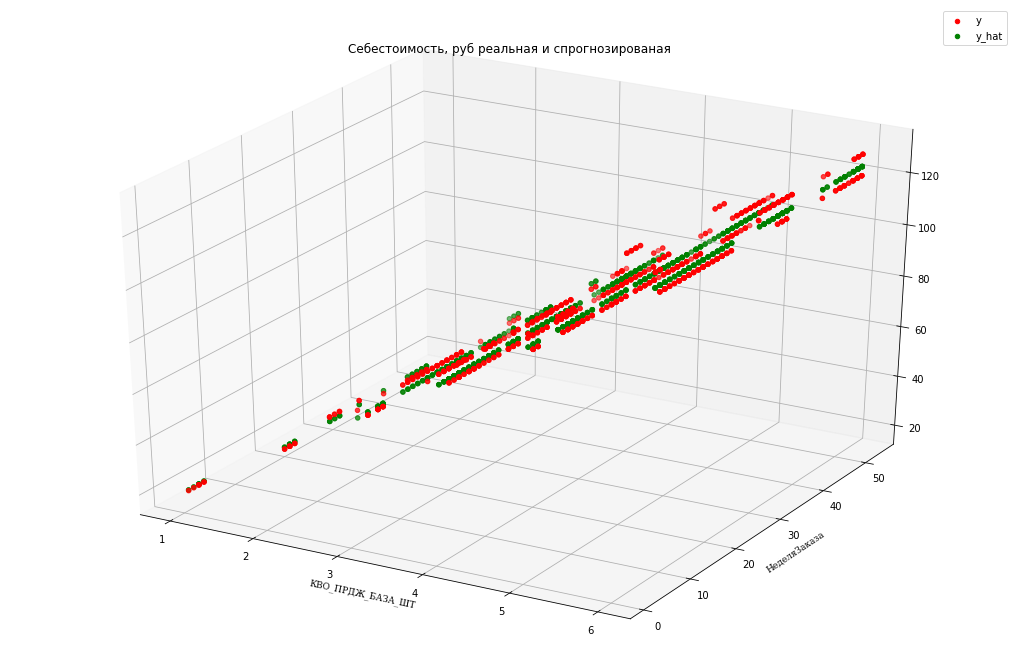

In [100]:
rcParams["figure.figsize"] = 18, 12
%config InlineBackend.figure_format
from mpl_toolkits.mplot3d import Axes3D

label_font = {
    "fontsize": 9,
    "family": "serif",
}

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['КВО_ПРДЖ_БАЗА_ШТ'], df['НеделяЗаказа'], y, zdir='z', c= 'red')
ax.scatter(df['КВО_ПРДЖ_БАЗА_ШТ'], df['НеделяЗаказа'], np.dot(X, B), zdir='z', c= 'green')
plt.xlabel("КВО_ПРДЖ_БАЗА_ШТ", fontdict=label_font)
plt.ylabel("НеделяЗаказа", fontdict=label_font)
plt.title("Себестоимость, руб реальная и спрогнозированая")
plt.legend(labels=["y", "y_hat"])
plt.show()

In [101]:
mse = ((y-np.dot(X, B))**2).sum()/len(y)
mse

10.349318361900725

In [102]:
A_mean = 100 * np.mean(np.abs((y - np.dot(X, B)) / y))
A_mean

3.1821512833698655

Проверим, является ли полученная модель статистически значимой с помощью критерия Фишера. Установим уровень значимости альфа = 0,05. 
* 1) H0: модель не является статистически значимой
* 2) H1: модель является статистически значимой

In [103]:
n = len(y)
p = X.shape[1]
alpha = 0.05
n, p, alpha

(1021, 3, 0.05)

In [104]:
df1 = p - 1
df1

2

In [105]:
df2 = n - p
df2

1018

In [106]:
SSf = ((np.dot(X, B) - y.mean())**2).sum()
SSf

634157.2676578157

In [107]:
SSo = ((y-np.dot(X, B))**2).sum()
SSo

10566.65404750064

In [108]:
MSf = SSf / df1
MSf

317078.63382890786

In [109]:
MSo = SSo / df2
MSo

10.379817335462318

In [110]:
Fp = MSf / MSo
Fp

30547.61211891646

При 5 % уровне значимости и степенях свободы k1=2 и k2=1021−2=1018 табличное значение критерия: Fкр=4.6.

Fp > Ft модель является статистически значимой на уровне значимости альфа = 0,05

Далее идет немного EDA...

In [111]:
!pip install -U -q ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [112]:
import pylab
import matplotlib.dates
from pylab import rcParams


import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import Image, display, HTML

In [116]:
df = pd.read_csv('Order1c_pred.csv')
df['Себестоимость'] = df['ЦЕНА_ЗКП_РУБ']*df['КВО_ПРДЖ_БАЗА_ШТ']

In [117]:
def plot_up_to(year, goods):   
    result = df.query(f'(КодТовара == "{goods}") & (ГодЗаказа == "{year}")')
    xdata = result['НеделяЗаказа']
    ydata = result['Себестоимость']
    rcParams["figure.figsize"] = 10, 8

    plt.scatter(xdata,ydata)
    plt.title('Себестоимость, руб товара по неделям')
    plt.show()

_ = interact(plot_up_to, year=widgets.Dropdown(options=list(df["ГодЗаказа"].unique()), value=2018, description='Год заказа:'), 
             goods=widgets.Dropdown(options=list(df["КодТовара"].unique()), description='Код товара:'))

interactive(children=(Dropdown(description='Год заказа:', options=(2018, 2016, 2017, 2015), value=2018), Dropd…